In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_08 = pd.read_csv('./all_alpha_08.csv', sep=',')
df_18 = pd.read_csv('./all_alpha_18.csv', sep=',')

In [3]:
df_08.rename(lambda c:c.replace(' ', '_'), axis=1, inplace=True)
df_18.rename(lambda c:c.replace(' ', '_'), axis=1, inplace=True)

In [4]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales_Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood_ID          2404 non-null   object 
 9   Veh_Class             2404 non-null   object 
 10  Air_Pollution_Score   2404 non-null   object 
 11  FE_Calc_Appr          2205 non-null   object 
 12  City_MPG              2205 non-null   object 
 13  Hwy_MPG               2205 non-null   object 
 14  Cmb_MPG               2205 non-null   object 
 15  Unadj_Cmb_MPG        

## Number of columns per dataset

In [5]:
#2008
print(len(df_08.columns))

18


In [6]:
#2018
print(len(df_18.columns))

18


## Number of records per dataset

In [7]:
#2008
len(df_08.count(axis=1))

2404

In [8]:
#2018
len(df_18.count(axis=1))

1611

## Number of duplicate rows

In [9]:
#2008 I thought i was being super clevel with this dumbass function and then
# Derek whips out the df_08.duplicated().sum()....oh well, it was good practice
is_duplicate08 = list(df_08.duplicated(subset=None, keep='first'))

def find_duplicate(a_list):
    duplicate = [i for i in a_list if i is True]
    return len(duplicate)
find_duplicate(is_duplicate08)




25

In [10]:
#2018
is_duplicate18 = list(df_18.duplicated(subset=None, keep='first'))

def find_duplicate(a_list):
    duplicate = [i for i in a_list if i is True]
    return len(duplicate)
find_duplicate(is_duplicate18)


0

## Features with missing values

In [11]:
df_08.isna().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales_Area                0
Stnd                      0
Underhood_ID              0
Veh_Class                 0
Air_Pollution_Score       0
FE_Calc_Appr            199
City_MPG                199
Hwy_MPG                 199
Cmb_MPG                 199
Unadj_Cmb_MPG           199
Greenhouse_Gas_Score    199
SmartWay                  0
dtype: int64

In [12]:
df_18.isna().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert_Region             0
Stnd                    0
Stnd_Description        0
Underhood_ID            0
Veh_Class               0
Air_Pollution_Score     0
City_MPG                0
Hwy_MPG                 0
Cmb_MPG                 0
Greenhouse_Gas_Score    0
SmartWay                0
Comb_CO2                0
dtype: int64

## Non-null unique values

In [13]:
#2008
df_08.nunique().sum()

1757

In [14]:
#2018
df_18.nunique().sum()

1217

## Count of unique fuel types

In [15]:
#2008
df_08['Fuel'].value_counts()

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64

In [16]:
#2018
df_18['Fuel'].value_counts()

Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

## Drop unneeded columns

In [ ]:
# We used a DataFrame.rename() method to pass a Python object into it (whether it's a list ot dictionary) that
# allowed us to act on the column names themselves. There's another type of method that helps you delete entire
# columns either. Find it and use it.


In [17]:
df_08 = df_08.drop(['FE_Calc_Appr', 'Unadj_Cmb_MPG'], axis=1)
 



In [18]:
df_18 = df_18.drop(['Stnd_Description', 'Comb_CO2'], axis=1)


## Rename 'Sales Area' column in 2008 dataframe

In [19]:
# # Hint: You can use a lambda function
df_08.rename(lambda c:c.replace('Sales_Area', 'Cert_Region'), axis=1, inplace=True)

## Make more consistent column labels

In [ ]:
#See Top of Page

# Compare columns names and make sure they're the same

In [20]:
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

# CHECKPOINT: SAVE EVERYTHING THUS FAR INTO A DATAFRAME

In [21]:
df_08.to_csv('df_08_v2.csv', index=False)
df_18.to_csv('df_18_v2.csv', index=False)

In [ ]:
df_08.head()

## Only return records with a 'CA' cert_region

In [22]:
df_08.query('Cert_Region == "CA"')

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_Region,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,CA,U2,8HNXV03.5RKR,midsize car,7,17,26,20,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,VOLVO V70,3.2,(6 cyl),Auto-S6,2WD,Gasoline,CA,U2,8VVXB03.2U2N,station wagon,7,16,24,19,5,no
2396,VOLVO XC 70,3.2,(6 cyl),Auto-S6,4WD,Gasoline,CA,U2,8VVXB03.2U2N,SUV,7,15,22,17,4,no
2398,VOLVO XC 90,3.2,(6 cyl),Auto-S6,2WD,Gasoline,CA,U2,8VVXB03.2U2N,SUV,7,14,20,16,4,no
2399,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,CA,U2,8VVXB03.2U2N,SUV,7,14,20,16,4,no


In [23]:
df_18.query('Cert_Region == "CA"')

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert_Region,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,JHNXT03.5GV3,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,JHNXT03.5GV3,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,JHNXV03.5LH3,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,CA,L3ULEV125,JHNXV03.5LH3,small car,3,21,30,24,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,VOLVO XC 60,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,JVVXJ02.0P30,small SUV,7,26/60,28/58,26/59,10,Elite
1603,VOLVO XC 90,2.0,4.0,SemiAuto-8,2WD,Gasoline,CA,L3ULEV70,JVVXJ02.0A70,standard SUV,5,22,29,25,5,No
1605,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3ULEV70,JVVXJ02.0A70,standard SUV,5,22,28,24,5,No
1607,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3ULEV70,JVVXJ02.0B70,standard SUV,5,20,27,23,5,No


## Drop 'cert_region' column from each df, since our 'cert_region' is implied

In [24]:
df_08.drop(columns=['Cert_Region'], axis=1, inplace=True)
df_08.head(1)


,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,U2,8HNXT03.7PKR,SUV,7,15,20,17,4,no


In [25]:
df_18.drop(columns=['Cert_Region'], axis=1, inplace=True)
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,T3B125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No


## Drop records with missing values

In [26]:
df_08.dropna(inplace=True)
df_08.isnull().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Stnd                    0
Underhood_ID            0
Veh_Class               0
Air_Pollution_Score     0
City_MPG                0
Hwy_MPG                 0
Cmb_MPG                 0
Greenhouse_Gas_Score    0
SmartWay                0
dtype: int64

In [27]:
df_18.dropna(inplace=True)
df_18.isnull().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Stnd                    0
Underhood_ID            0
Veh_Class               0
Air_Pollution_Score     0
City_MPG                0
Hwy_MPG                 0
Cmb_MPG                 0
Greenhouse_Gas_Score    0
SmartWay                0
dtype: int64

In [28]:
df_08.drop_duplicates(inplace=True)
df_08[df_08.duplicated()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


In [29]:
df_18.drop_duplicates(inplace=True)
df_18[df_18.duplicated()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


# CHECKPOINT: SAVE EVERYTHING TO .CSV

In [30]:
df_08.to_csv('df_08_v3.csv', index=False)
df_18.to_csv('df_18_v3.csv', index=False)

In [31]:
df_08 = pd.read_csv('df_08_v3.csv')
df_18 = pd.read_csv('df_18_v3.csv')

## Fix all datatypes

In [ ]:
# Check the datatypes of your columns

# Make sure your datatypes are consistent across both datasets

# You can use the .value_counts() method to find unique values within a column. Use this to figure out how to
# determine how to change the data within the column so that the datatypes across both datasets in those columns 
# would match. You'll need this later.

In [32]:
df_08.dtypes


Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score      object
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score     object
SmartWay                 object
dtype: object

In [33]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score       int64
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score      int64
SmartWay                 object
dtype: object

In [34]:
df_08.Cyl.value_counts()

(6 cyl)     858
(4 cyl)     592
(8 cyl)     517
(5 cyl)     113
(12 cyl)     60
(10 cyl)     29
(2 cyl)       4
(16 cyl)      2
Name: Cyl, dtype: int64

In [35]:
df_18.Cyl.value_counts()

4.0     716
6.0     486
8.0     298
3.0      36
12.0     18
5.0       4
16.0      2
Name: Cyl, dtype: int64

In [36]:
df_08.Cyl = df_08.Cyl.str.extract('(\d+)').astype(np.int64)
df_08.Cyl.value_counts()

6     858
4     592
8     517
5     113
12     60
10     29
2       4
16      2
Name: Cyl, dtype: int64

In [37]:
df_18.Cyl = df_18.Cyl.astype(np.int64)
df_18.Cyl.value_counts()

4     716
6     486
8     298
3      36
12     18
5       4
16      2
Name: Cyl, dtype: int64

# CHECKPOINT: SAVE EVERYTHING TO .CSV

In [38]:
df_08.to_csv('df_08_v4.csv', index=False)
df_18.to_csv('df_18_v4.csv', index=False)

In [39]:
df_08 = pd.read_csv('df_08_v4.csv')
df_18 = pd.read_csv('df_18_v4.csv')

In [41]:
df_08.duplicated().sum()

0

In [42]:
df_08.isnull().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Stnd                    0
Underhood_ID            0
Veh_Class               0
Air_Pollution_Score     0
City_MPG                0
Hwy_MPG                 0
Cmb_MPG                 0
Greenhouse_Gas_Score    0
SmartWay                0
dtype: int64

In [43]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                       int64
Trans                    object
Drive                    object
Fuel                     object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score      object
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score     object
SmartWay                 object
dtype: object

In [44]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                       int64
Trans                    object
Drive                    object
Fuel                     object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score       int64
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Greenhouse_Gas_Score      int64
SmartWay                 object
dtype: object

## Change datatypes in 'air_pollution' column

In [46]:
df_08.Air_Pollution_Score.value_counts()

6      1454
7       500
9.5      80
6/6      32
3        31
9        23
3/3      21
8        15
7/7      12
1         6
6/4       1
Name: Air_Pollution_Score, dtype: int64

In [48]:
df_08.query('Air_Pollution_Score == "6/4"')

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
1331,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,L2,8MBXV03.0U2A,small car,6/4,13/18,19/25,15/21,7/6,no


# Find Stuff with '/'

In [ ]:
# For this portion, you'll probably find out that there are some records that have a '/' included in them.

# If you want to follow a similar process that worked for me, I:

# 1. Ran a query to find those records that included the '/'
# 2. Made 2 copies (yes, 2 copies) of those queried dataframes
# 3. For the first copy, remove all records on the right side of the '/'
# 4. For the second copy, remove all records on the left side of the '/'
# 5. Drop those same '/' records from the original dataset (from when you ran the query above)
# 6. Add the records from both of the copies into the original (You might want to reset your indeces as well)

In [50]:
hybrid_08 = df_08[df_08.Fuel.str.contains('/')]
hybrid_08

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,B4,8GMXT05.3381,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,B4,8GMXT05.3381,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,B5,8GMXT05.3373,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,B5,8GMXT05.3373,SUV,6/6,11/14,14/19,12/16,6/4,no
378,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,B5,8GMXT05.3373,van,6/6,9/12,12/16,10/14,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,ethanol/gas,B8,8CRXT04.7PJP,pickup,3/3,9/14,12/19,10/15,4/3,no
1543,NISSAN Armada,5.6,8,Auto-L5,2WD,ethanol/gas,B5,8NSXT05.6G9B,SUV,6/6,9/12,13/18,10/14,4/2,no
1544,NISSAN Armada,5.6,8,Auto-L5,4WD,ethanol/gas,B5,8NSXT05.6G9B,SUV,6/6,9/12,13/17,10/14,4/2,no
1587,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol/gas,B5,8NSXT05.6G9B,pickup,6/6,9/12,13/17,10/14,4/2,no


In [56]:
df1 = hybrid_08.copy()
df2 = hybrid_08.copy()

In [57]:
df_08['Fuel']

0       Gasoline
1       Gasoline
2       Gasoline
3       Gasoline
4       Gasoline
          ...   
2170    Gasoline
2171    Gasoline
2172    Gasoline
2173    Gasoline
2174    Gasoline
Name: Fuel, Length: 2175, dtype: object

#### Select all rows with records of slashed values

In [58]:
columns_with_slashes = ['Fuel', 'Air_Pollution_Score', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG', 'Greenhouse_Gas_Score']

for c in columns_with_slashes:
    df1[c] = df1[c].apply(lambda  s:s.split('/')[0])
    df2[c] = df2[c].apply(lambda  s:s.split('/')[1])

In [59]:
df1

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,B4,8GMXT05.3381,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,B4,8GMXT05.3381,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,B5,8GMXT05.3373,SUV,6,11,15,12,6,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,B5,8GMXT05.3373,SUV,6,11,14,12,6,no
378,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol,B5,8GMXT05.3373,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,ethanol,B8,8CRXT04.7PJP,pickup,3,9,12,10,4,no
1543,NISSAN Armada,5.6,8,Auto-L5,2WD,ethanol,B5,8NSXT05.6G9B,SUV,6,9,13,10,4,no
1544,NISSAN Armada,5.6,8,Auto-L5,4WD,ethanol,B5,8NSXT05.6G9B,SUV,6,9,13,10,4,no
1587,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol,B5,8NSXT05.6G9B,pickup,6,9,13,10,4,no


In [60]:
df2

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,B4,8GMXT05.3381,SUV,7,14,20,16,4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,B4,8GMXT05.3381,SUV,7,14,19,16,4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,B5,8GMXT05.3373,SUV,6,14,20,16,4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,B5,8GMXT05.3373,SUV,6,14,19,16,4,no
378,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,gas,B5,8GMXT05.3373,van,6,12,16,14,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,gas,B8,8CRXT04.7PJP,pickup,3,14,19,15,3,no
1543,NISSAN Armada,5.6,8,Auto-L5,2WD,gas,B5,8NSXT05.6G9B,SUV,6,12,18,14,2,no
1544,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,B5,8NSXT05.6G9B,SUV,6,12,17,14,2,no
1587,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,B5,8NSXT05.6G9B,pickup,6,12,17,14,2,no


In [61]:
df1.append(df2)

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,B4,8GMXT05.3381,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,B4,8GMXT05.3381,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,B5,8GMXT05.3373,SUV,6,11,15,12,6,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,B5,8GMXT05.3373,SUV,6,11,14,12,6,no
378,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol,B5,8GMXT05.3373,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,gas,B8,8CRXT04.7PJP,pickup,3,14,19,15,3,no
1543,NISSAN Armada,5.6,8,Auto-L5,2WD,gas,B5,8NSXT05.6G9B,SUV,6,12,18,14,2,no
1544,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,B5,8NSXT05.6G9B,SUV,6,12,17,14,2,no
1587,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,B5,8NSXT05.6G9B,pickup,6,12,17,14,2,no


In [62]:
df_08.drop(hybrid_08.index, inplace=True)
df_08 = df_08.append(df1.append(df2), ignore_index=True)

In [64]:
df_08[df_08['Fuel'].str.contains('/')]

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


### Repeat for 2018

In [70]:
hybrid_18 = df_18[df_18['Fuel'].str.contains('/')]
hybrid_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
1487,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,L3ULEV125,JBMXV02.0H48,small car,3,28/66,34/78,30/71,10,Yes
1488,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,T3B125,JBMXV02.0H48,small car,3,28/66,34/78,30/71,10,Yes
1489,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,L3SULEV30,JBMXV02.0H30,small car,7,27/70,31/75,29/72,10,Elite
1490,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,T3B30,JBMXV02.0H30,small car,7,27/70,31/75,29/72,10,Elite
1491,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,L3SULEV30,JBMXV02.0H30,small car,7,27/66,31/68,28/67,10,Elite


In [71]:
df1 = hybrid_18.copy()
df2 = hybrid_18.copy()

In [72]:
columns_with_slashes = ['Fuel', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG']

for c in columns_with_slashes:
    df1[c] = df1[c].apply(lambda s:s.split('/')[0])
    df2[c] = df2[c].apply(lambda s:s.split('/')[1])

In [73]:
df_18.drop(hybrid_18.index, inplace=True)
df_18 = df_18.append(df1.append(df2), ignore_index=True)

In [74]:
df_18[df_18.Fuel.str.contains('/')]

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


## Gas/Gasoline?

In [76]:
df_08.Fuel.value_counts()

Gasoline    2099
ethanol       67
gas           66
diesel         7
CNG            2
Name: Fuel, dtype: int64

In [77]:
df_18.Fuel.value_counts()

Gasoline       1497
Ethanol          98
Gas              98
Electricity      48
Diesel           38
Name: Fuel, dtype: int64

In [78]:
gas_type_08 = df_08.query('Fuel == "Gas"').copy()
gas_type_08.replace(to_replace='Gas', value='Gasoline', inplace=True)
df_08.drop(gas_type_08.index, inplace=True)
df_08 = df_08.append(gas_type_08, ignore_index=True)

In [79]:
gas_type_18 = df_18.query('Fuel == "Gas"').copy()
gas_type_18.replace(to_replace='Gas', value='Gasoline', inplace=True)
df_18.drop(gas_type_18.index, inplace=True)
df_18 = df_18.append(gas_type_18, ignore_index=True)

In [81]:
df_08.Fuel.value_counts()

Gasoline    2099
ethanol       67
gas           66
diesel         7
CNG            2
Name: Fuel, dtype: int64

In [82]:
df_18.Fuel.value_counts()

Gasoline       1595
Ethanol          98
Electricity      48
Diesel           38
Name: Fuel, dtype: int64

## Fix `*_mpg, greenhouse_gas_score and air_pollution_score` datatypes

In [85]:
df_08.City_MPG = df_08.City_MPG.astype(int)
df_08.Hwy_MPG = df_08.Hwy_MPG.astype(int)
df_08.Cmb_MPG = df_08.Cmb_MPG.astype(int)

df_18.City_MPG = df_18.City_MPG.astype(int)
df_18.Hwy_MPG = df_18.Hwy_MPG.astype(int)
df_18.Cmb_MPG = df_18.Cmb_MPG.astype(int)

## Fix `greenhouse_gas_score, air_pollution_score` datatypes

In [88]:
df_08.Air_Pollution_Score = df_08.Air_Pollution_Score.astype(float)
df_18.Air_Pollution_Score = df_08.Air_Pollution_Score.astype(float)
df_08.Greenhouse_Gas_Score = df_08.Greenhouse_Gas_Score.astype(int)

In [90]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                       int64
Trans                    object
Drive                    object
Fuel                     object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score     float64
City_MPG                  int32
Hwy_MPG                   int32
Cmb_MPG                   int32
Greenhouse_Gas_Score      int32
SmartWay                 object
dtype: object

In [89]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                       int64
Trans                    object
Drive                    object
Fuel                     object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score     float64
City_MPG                  int32
Hwy_MPG                   int32
Cmb_MPG                   int32
Greenhouse_Gas_Score      int64
SmartWay                 object
dtype: object

In [91]:
(df_18.dtypes == df_08.dtypes).all()

False

# CHECKPOINT: SAVE EVERYTHING

In [92]:
df_08.to_csv('df_08_v5.csv', index=False)
df_18.to_csv('df_18_v5.csv', index=False)

In [93]:
df_08 = pd.read_csv('df_08_v5.csv')
df_18 = pd.read_csv('df_18_v5.csv')

# Create visuals of findings

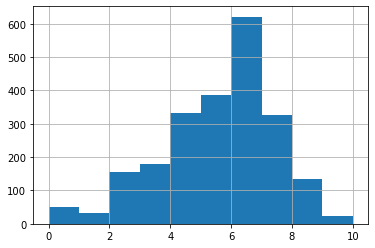

In [95]:
df_08.Greenhouse_Gas_Score.hist()
plt.show();

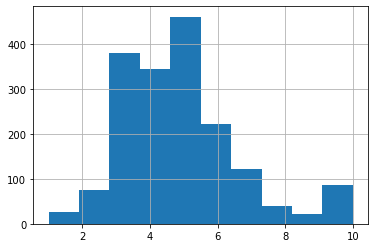

In [96]:
df_18.Greenhouse_Gas_Score.hist()
plt.show();

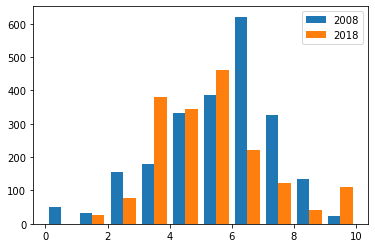

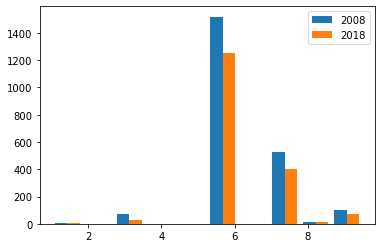

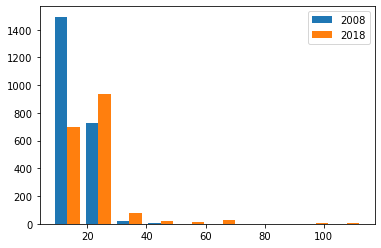

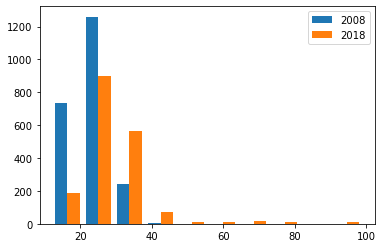

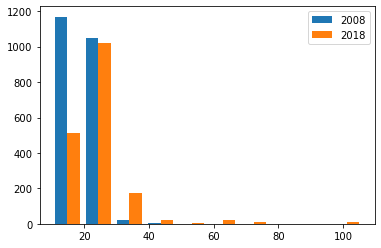

In [97]:
plt.figure()
plt.hist([df_08.Greenhouse_Gas_Score, df_18.Greenhouse_Gas_Score])
plt.legend(['2008', '2018']);

plt.figure()
plt.hist([df_08.Air_Pollution_Score, df_18.Air_Pollution_Score])
plt.legend(['2008', '2018']);

plt.figure()
plt.hist([df_08.City_MPG, df_18.City_MPG])
plt.legend(['2008', '2018']);

plt.figure()
plt.hist([df_08.Hwy_MPG, df_18.Hwy_MPG])
plt.legend(['2008', '2018']);

plt.figure()
plt.hist([df_08.Cmb_MPG, df_18.Cmb_MPG])
plt.legend(['2008', '2018']);

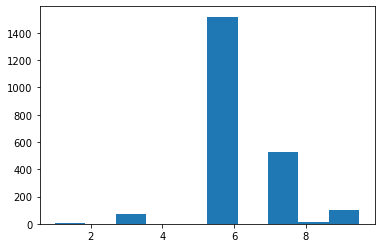

In [99]:
plt.hist(df_08.Air_Pollution_Score);

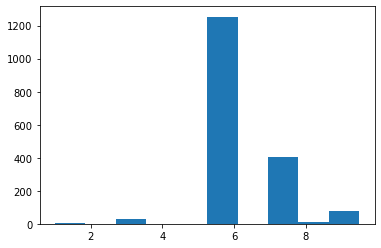

In [98]:
plt.hist(df_18.Air_Pollution_Score);

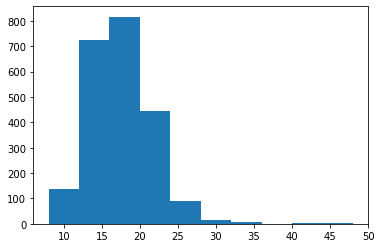

In [100]:
plt.hist(df_08.City_MPG);

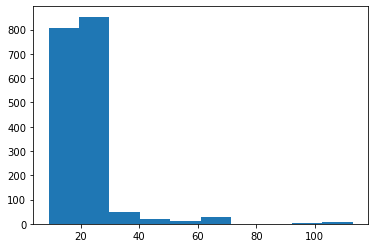

In [101]:
plt.hist(df_18.City_MPG);

In [ ]:
# Scatter plots are used to find the correlation of two or more variables. Find thing that correlate with 
# combined MPG only.

# What's the correlation between combined MPG and displacement?

# What's the correlation between combined MPG and the number of cylinders?

# What's the correlation between combined MPG and the air pollution score?

# What's the correlation between combined MPG and greenhouse gas score?

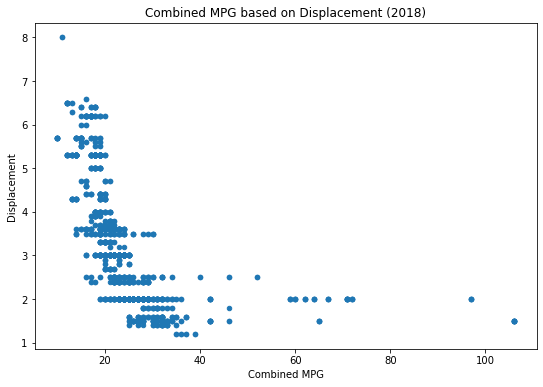

In [104]:
df_18.plot(kind='scatter', x='Cmb_MPG', y='Displ', figsize=(9, 6))
plt.title('Combined MPG based on Displacement (2018)')
plt.xlabel('Combined MPG')
plt.ylabel('Displacement');

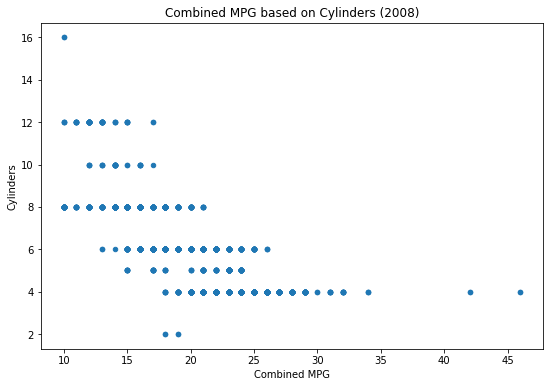

In [105]:
df_08.plot(kind='scatter', x='Cmb_MPG', y='Cyl', figsize=(9, 6))
plt.title('Combined MPG based on Cylinders (2008)')
plt.xlabel('Combined MPG')
plt.ylabel('Cylinders');

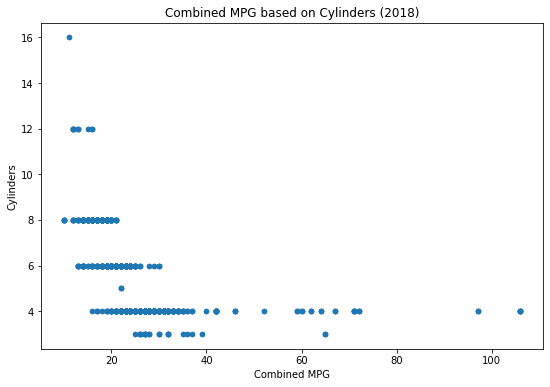

In [107]:
df_18.plot(kind='scatter', x='Cmb_MPG', y='Cyl', figsize=(9, 6))
plt.title('Combined MPG based on Cylinders (2018)')
plt.xlabel('Combined MPG')
plt.ylabel('Cylinders');

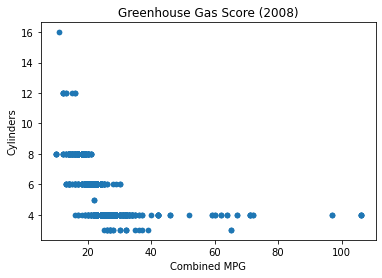

In [109]:
df_18.plot(kind='scatter', x='Cmb_MPG', y="Cyl")
plt.xlabel('Combined MPG')
plt.ylabel('Cylinders')
plt.title('Greenhouse Gas Score (2008)');

## How many more car models use alternative fuels in 2018 as opposed to 2008?
* ### May need to Google the answer to find out which fuel types are considered 'alternative'

In [110]:
df_08.Fuel.value_counts()

Gasoline    2099
ethanol       67
gas           66
diesel         7
CNG            2
Name: Fuel, dtype: int64

In [111]:
df_18.Fuel.value_counts()

Gasoline       1595
Ethanol          98
Electricity      48
Diesel           38
Name: Fuel, dtype: int64

In [112]:
alt_fuels_08 = df_08.query('Fuel in ["CNG", "Ethanol"]')
alt_fuels_08

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
871,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,S2,8HNXV01.8XW3,small car,9.5,24,36,28,9,yes
872,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,B2,8HNXV01.8XW3,small car,9.0,24,36,28,9,yes


In [114]:
alt_fuels_18 = df_18.query('Fuel in ["Ethanol", "Electricity"]')
alt_fuels_18

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay
1495,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,L3ULEV70,JGMXV03.6166,large car,6.0,14,20,16,4,No
1496,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,T3B70,JGMXV03.6166,large car,6.0,14,20,16,4,No
1497,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,L3ULEV70,JGMXT04.3187,pickup,7.0,12,16,14,4,No
1498,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,T3B70,JGMXT04.3187,pickup,6.0,12,16,14,4,No
1499,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,L3ULEV70,JGMXT04.3187,pickup,7.0,12,15,13,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,T3B30,JVVXV02.0P30,midsize car,6.0,70,72,71,10,Elite
1677,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,L3SULEV30,JVVXJ02.0P30,small SUV,6.0,60,58,59,10,Elite
1678,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,T3B30,JVVXJ02.0P30,small SUV,6.0,60,58,59,10,Elite
1679,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Electricity,L3SULEV30,JVVXJ02.0P30,standard SUV,6.0,63,61,62,10,Elite


There are 27 more models using alternative fuels in 2018 than in 2008.


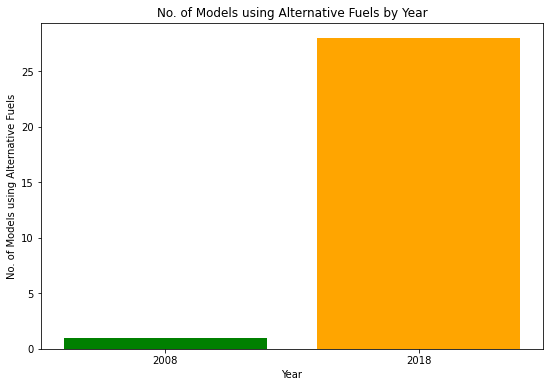

In [118]:
plt.subplots(figsize=(9, 6))
plt.bar(['2008', '2018'], [alt_fuels_08.Model.nunique(), alt_fuels_18.Model.nunique()], color=['green', 'orange'])
plt.xlabel('Year')
plt.ylabel('No. of Models using Alternative Fuels')
plt.title('No. of Models using Alternative Fuels by Year');

print(f"There are {alt_fuels_18.Model.nunique() - alt_fuels_08.Model.nunique()} more models using alternative fuels in 2018 than in 2008.")

In [ ]:
# Figure out a way to plot two different bins from two different datasets into one bar plot. You'll need this
# skill for the following questions.

## How much has the average fuel economy improved since 2008?

In [120]:
fe_08 = df_08.Cmb_MPG
fe_18 = df_18.Cmb_MPG

There average fuel economy has improved by 5.1 MPG


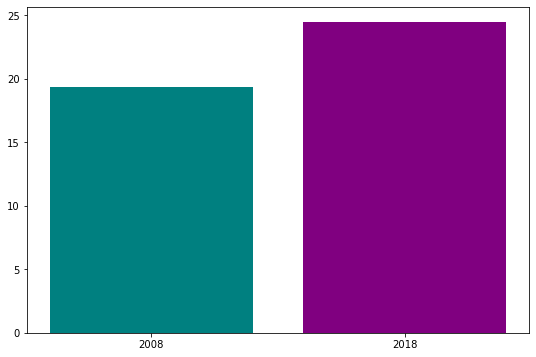

In [121]:
plt.subplots(figsize=(9,6))
plt.bar(['2008', '2018'], [fe_08.mean(), fe_18.mean()], color=['teal', 'purple']);

print(f"There average fuel economy has improved by {np.round(fe_18.mean() - fe_08.mean(), 1)} MPG")

## Which type of vehicle's fuel economy has improved the most since 2008?

In [ ]:
# Figure out a way to plot overlapping bins, so you can see the visual difference between data in your plot. 
# For example, This would be what the plot looks like:

In [123]:
df_08.Veh_Class.value_counts()

small car        693
SUV              648
midsize car      278
pickup           269
large car        133
station wagon    123
van               58
minivan           39
Name: Veh_Class, dtype: int64

In [122]:
df_18.Veh_Class.value_counts()

small car          602
midsize car        288
small SUV          217
standard SUV       211
pickup             181
large car          178
station wagon       67
special purpose     27
minivan              8
Name: Veh_Class, dtype: int64

In [124]:
fe_08 = df_08.copy()
fe_18 = df_18.copy()

In [125]:
fe_08 = df_08.query('Veh_Class == "minivan"')
fe_08.replace(to_replace='minivan', value='van', inplace=True)
df_08.drop(fe_08.index, inplace=True)
df_08 = df_08.append(fe_08, ignore_index=True)

fe_18 = df_18.query('Veh_Class == "minivan"')
fe_18.replace(to_replace='minivan', value='van', inplace=True)
df_18.drop(fe_18.index, inplace=True)
df_18 = df_18.append(fe_18, ignore_index=True)

C:\Users\rrhoa\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [127]:
df_08.query('Veh_Class == "van"').Veh_Class.value_counts()

van    97
Name: Veh_Class, dtype: int64

In [128]:
df_18.drop(df_18.query('Veh_Class == "special purpose"').index, inplace=True)
df_18.query('Veh_Class == "special purpose"')

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


In [129]:
columns_to_change = ['small SUV', 'standard SUV']
for c in range(len(columns_to_change)):
    records = df_18[df_18['Veh_Class'] == columns_to_change[c]].copy()
    records.replace(to_replace=columns_to_change[c], value='SUV', inplace=True)
    df_18.drop(records.index, inplace=True)
    df_18 = df_18.append(records)

In [130]:
df_08.loc[df_08.Veh_Class == "special purpose"]

,Model,Displ,Cyl,Trans,Drive,Fuel,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,City_MPG,Hwy_MPG,Cmb_MPG,Greenhouse_Gas_Score,SmartWay


#### (2008) Average fuel economy by vehicle type

In [132]:
vt_fe_08 = df_08.groupby('Veh_Class').City_MPG.mean().apply(lambda v:round(v))
vt_fe_08

Veh_Class
SUV              16
large car        16
midsize car      19
pickup           14
small car        18
station wagon    20
van              14
Name: City_MPG, dtype: int64

#### (2018) Average fuel economy by vehicle type

In [133]:
vt_fe_18 = df_18.groupby('Veh_Class').City_MPG.mean().apply(lambda v:round(v))
vt_fe_18

Veh_Class
SUV              19
large car        21
midsize car      26
pickup           16
small car        24
station wagon    25
van              18
Name: City_MPG, dtype: int64

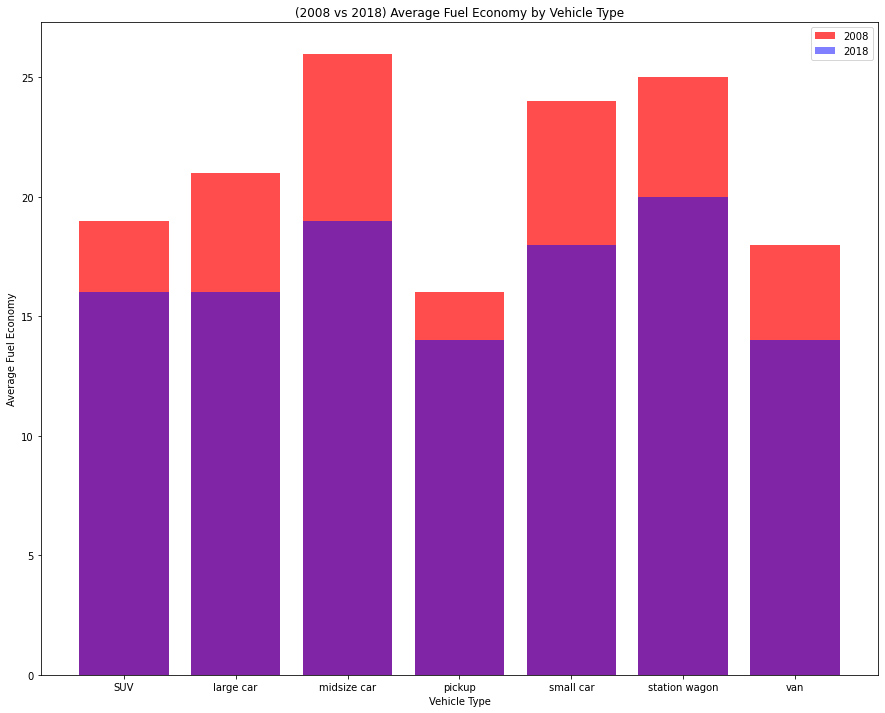

In [134]:
plt.subplots(figsize=(15, 12))
plt.bar(vt_fe_18.index, vt_fe_18, color='red', alpha=0.7)
plt.bar(vt_fe_08.index, vt_fe_08, color='blue', alpha=0.5)
plt.title('(2008 vs 2018) Average Fuel Economy by Vehicle Type')
plt.ylabel('Average Fuel Economy')
plt.xlabel('Vehicle Type')
plt.legend(['2008', '2018'], loc='best');

## Which model has the highest `air_pollution_score` and fuel economy in 2008 and 2018? Compare them. 

In [148]:
aps_08 = df_08.Air_Pollution_Score.max()
mileage_08 = df_08.Cmb_MPG.max()

In [149]:
best_08 = df_08.query(f'Air_Pollution_Score == {aps_08} and Cmb_MPG == {mileage_08}')
best_model_08 = best_08.iloc[0].Model
best_mpg_08 = best_08.iloc[0, 7:10]

In [151]:
aps_18 = df_18.Air_Pollution_Score.max()
mileage_18 = df_18.Cmb_MPG.max()

In [154]:
#I messed this up somehow so lets pretend my graph below is really cool. 
best_18 = df_18.query(f'Air_Pollution_Score == {aps_18} and Cmb_MPG == {mileage_18}').iloc[[0]]
best_model_18 = best_18.iloc[0].Model
best_mpg_18 = best_18.iloc[0, 7:10]

IndexError: positional indexers are out-of-bounds

In [153]:
best_mpg_08

Underhood_ID           8TYXV01.5HC3
Veh_Class               midsize car
Air_Pollution_Score             9.5
Name: 1861, dtype: object

In [155]:
cars = [f'{best_model_08} (2008)', f'{best_model_18} (2018)']

plt.subplots(figsize=(15, 12))
plt.bar(best_mpg_08.index, best_mpg_08, color='red', alpha=0.7)
plt.bar(best_mpg_18.index, best_mpg_18, color='blue', alpha=0.5)
plt.title('Most Economic Cars by Year')
plt.ylabel('Combined MPG')
plt.xlabel('Vehicle Model')
plt.legend(cars, loc='best');

NameError: name 'best_model_18' is not defined